**Dealing with image data: Classification of vehicles as Emergency Vehicles and Non-Emergency Vehicles : Binary Classification problem**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [4]:
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [6]:
data=pd.read_csv(r'/content/drive/MyDrive/Analytics Vidhya/Image Classification/Dataset_Emergency_Vehicle/emergency_classification.csv')

In [7]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
seed=42
rng=np.random.RandomState(seed)

In [9]:
X=[]
for image_name in data.image_names:
  img=plt.imread(r'/content/drive/MyDrive/Analytics Vidhya/Image Classification/Dataset_Emergency_Vehicle/images/'+image_name)
  X.append(img)

In [10]:
X=np.array(X)

In [11]:
y=data.emergency_or_not.values

In [12]:
X.shape #images are stored in RGB format

(2352, 224, 224, 3)

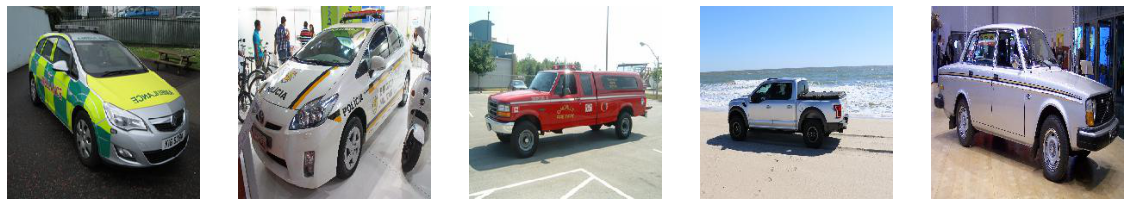

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
  ax[i].imshow(X[i*400])
  ax[i].axis('off')

Preprocessing the data

In [17]:
X=X.reshape(X.shape[0],224*224*3) #here, X.shape[0] is the number of images, in this case, 2352
#Printing the reshaped np array:
X.shape

(2352, 150528)

In [18]:
X.min(),X.max() #these are the minimum and maximum pixel values

(0, 255)

In [19]:
#Scaling the pixel values to bring it in between 0-1
X=X/X.max()

In [20]:
#Updated minimum and maximum pixel values:
X.min(),X.max()

(0.0, 1.0)

Segregating training and validation sets

In [21]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=seed)

In [22]:
#Checking the shapes of the sets:
(X_train.shape,y_train.shape),(X_val.shape,y_val.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

Defining our Model Architecture

In [25]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
#summarizing our model:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
#Training our model
h_callback=model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/50
13/13 [==============================] - 3s 82ms/step - loss: 0.8130 - accuracy: 0.5941 - val_loss: 0.6462 - val_accuracy: 0.6105
Epoch 2/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6405 - accuracy: 0.6355 - val_loss: 0.6866 - val_accuracy: 0.5680
Epoch 3/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6358 - accuracy: 0.6452 - val_loss: 0.6241 - val_accuracy: 0.6473
Epoch 4/50
13/13 [==============================] - 1s 55ms/step - loss: 0.6225 - accuracy: 0.6434 - val_loss: 0.6050 - val_accuracy: 0.6643
Epoch 5/50
13/13 [==============================] - 1s 56ms/step - loss: 0.5917 - accuracy: 0.6801 - val_loss: 0.5931 - val_accuracy: 0.6785
Epoch 6/50
13/13 [==============================] - 1s 53ms/step - loss: 0.5979 - accuracy: 0.6891 - val_loss: 0.5855 - val_accuracy: 0.6926
Epoch 7/50
13/13 [==============================] - 1s 52ms/step - loss: 0.5740 - accuracy: 0.7087 - val_loss: 0.5870 - val_accuracy: 0.6827
Epoch 8/50
13

Evaluating our model

In [29]:
preds=model.predict_classes(X_val)[:,0]
preds_probabilities=model.predict(X_val)[:,0]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
from sklearn.metrics import accuracy_score

print('Accuracy on validation set',accuracy_score(y_val,preds),"%")

Accuracy on validation set 0.6643059490084986 %


Visualizing our loss and accuracy

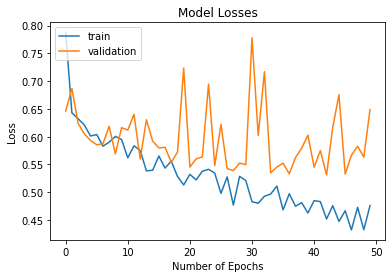

In [33]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

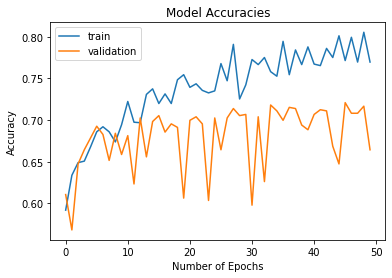

In [36]:
plt.plot(h_callback.history['accuracy'])
plt.plot(h_callback.history['val_accuracy'])
plt.title("Model Accuracies")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

Predicting with the original dataset

In [37]:
_,valid_vehicles,_,valid_y=train_test_split(data.image_names.values,y,test_size=0.3,random_state=seed)
#since we do not need the training data, we assign dummy variables
#obtaining a random index of an image for prediction
index=rng.choice(range(len(valid_vehicles)))

In [38]:
#obtaining the image name to the corresponding index, and it's probability
img_name=valid_vehicles[index]
prob=(preds_probabilities*100).astype(int)[index]

Model is: 11 % sure that this is an emergency vehicle.
And the actual class is: 0


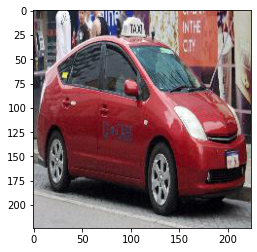

In [39]:
#checking and printing the output
img=plt.imread(r'/content/drive/MyDrive/Analytics Vidhya/Image Classification/Dataset_Emergency_Vehicle/images/'+img_name)
print("Model is:",prob,"% sure that this is an emergency vehicle.")
print("And the actual class is:",valid_y[index])
plt.imshow(img)

**Hyperparameter Tuning of our Model**

1. Changing the activation function to relu

In [40]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#Compiling
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#summarizing our model:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [41]:
h_callback=model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/50
13/13 [==============================] - 1s 89ms/step - loss: 1.5290 - accuracy: 0.4810 - val_loss: 0.6872 - val_accuracy: 0.4901
Epoch 2/50
13/13 [==============================] - 1s 57ms/step - loss: 0.6882 - accuracy: 0.5242 - val_loss: 0.6775 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 58ms/step - loss: 0.6677 - accuracy: 0.5942 - val_loss: 0.6521 - val_accuracy: 0.6331
Epoch 4/50
13/13 [==============================] - 1s 57ms/step - loss: 0.6459 - accuracy: 0.6278 - val_loss: 0.6508 - val_accuracy: 0.5935
Epoch 5/50
13/13 [==============================] - 1s 57ms/step - loss: 0.6182 - accuracy: 0.6549 - val_loss: 0.6786 - val_accuracy: 0.5751
Epoch 6/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6440 - accuracy: 0.6182 - val_loss: 0.6441 - val_accuracy: 0.6091
Epoch 7/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6181 - accuracy: 0.6485 - val_loss: 0.6366 - val_accuracy: 0.6346
Epoch 8/50
13

In [42]:
print("Accuracy on validation set:",accuracy_score(y_val,model.predict_classes(X_val)[:,0]),"%")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy on validation set: 0.7082152974504249 %


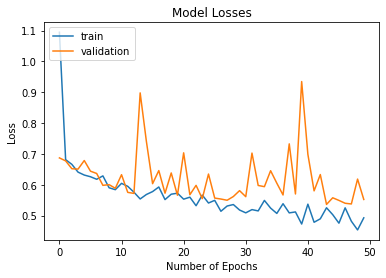

In [44]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

2. Increasing hidden neurons

In [45]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(1024,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#summarizing our model:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              154141696 
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [47]:
h_callback=model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/50
13/13 [==============================] - 2s 105ms/step - loss: 1.3735 - accuracy: 0.5675 - val_loss: 1.3003 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 74ms/step - loss: 0.8184 - accuracy: 0.5774 - val_loss: 1.1478 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 71ms/step - loss: 0.7620 - accuracy: 0.6064 - val_loss: 0.6653 - val_accuracy: 0.5850
Epoch 4/50
13/13 [==============================] - 1s 73ms/step - loss: 0.6399 - accuracy: 0.6578 - val_loss: 0.6427 - val_accuracy: 0.6147
Epoch 5/50
13/13 [==============================] - 1s 73ms/step - loss: 0.6399 - accuracy: 0.6547 - val_loss: 0.5951 - val_accuracy: 0.6841
Epoch 6/50
13/13 [==============================] - 1s 70ms/step - loss: 0.7020 - accuracy: 0.5782 - val_loss: 0.6284 - val_accuracy: 0.6402
Epoch 7/50
13/13 [==============================] - 1s 72ms/step - loss: 0.5783 - accuracy: 0.7149 - val_loss: 0.5912 - val_accuracy: 0.6827
Epoch 8/50
1

In [48]:
print("Accuracy on validation set:",accuracy_score(y_val,model.predict_classes(X_val)[:,0]),"%")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy on validation set: 0.7082152974504249 %


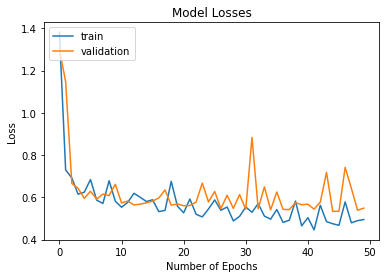

In [49]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

3. Increasing hidden neurons

In [50]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#summarizing our model:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [51]:
h_callback=model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/50
13/13 [==============================] - 1s 75ms/step - loss: 0.6981 - accuracy: 0.5728 - val_loss: 0.6779 - val_accuracy: 0.5609
Epoch 2/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6703 - accuracy: 0.5851 - val_loss: 0.6701 - val_accuracy: 0.5609
Epoch 3/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6629 - accuracy: 0.5885 - val_loss: 0.6646 - val_accuracy: 0.5609
Epoch 4/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6587 - accuracy: 0.5786 - val_loss: 0.6584 - val_accuracy: 0.5666
Epoch 5/50
13/13 [==============================] - 1s 57ms/step - loss: 0.6517 - accuracy: 0.5964 - val_loss: 0.6525 - val_accuracy: 0.6105
Epoch 6/50
13/13 [==============================] - 1s 56ms/step - loss: 0.6434 - accuracy: 0.6363 - val_loss: 0.6486 - val_accuracy: 0.6232
Epoch 7/50
13/13 [==============================] - 1s 55ms/step - loss: 0.6471 - accuracy: 0.6254 - val_loss: 0.6463 - val_accuracy: 0.6133
Epoch 8/50
13

In [52]:
print("Accuracy on validation set:",accuracy_score(y_val,model.predict_classes(X_val)[:,0]),"%")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy on validation set: 0.6983002832861189 %


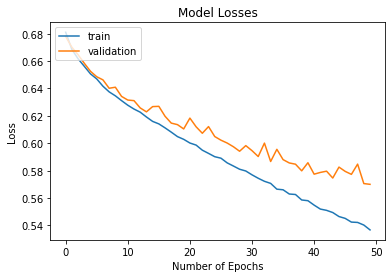

In [53]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

4. Increasing number of epochs

In [54]:
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#summarizing our model:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [55]:
h_callback=model.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/100
13/13 [==============================] - 1s 75ms/step - loss: 0.9146 - accuracy: 0.5279 - val_loss: 0.6585 - val_accuracy: 0.5680
Epoch 2/100
13/13 [==============================] - 1s 65ms/step - loss: 0.6397 - accuracy: 0.6342 - val_loss: 0.6345 - val_accuracy: 0.6459
Epoch 3/100
13/13 [==============================] - 1s 57ms/step - loss: 0.6306 - accuracy: 0.6602 - val_loss: 0.6148 - val_accuracy: 0.6827
Epoch 4/100
13/13 [==============================] - 1s 56ms/step - loss: 0.6148 - accuracy: 0.6764 - val_loss: 0.6145 - val_accuracy: 0.6615
Epoch 5/100
13/13 [==============================] - 1s 57ms/step - loss: 0.6066 - accuracy: 0.6783 - val_loss: 0.5999 - val_accuracy: 0.6771
Epoch 6/100
13/13 [==============================] - 1s 57ms/step - loss: 0.5948 - accuracy: 0.7082 - val_loss: 0.6042 - val_accuracy: 0.6700
Epoch 7/100
13/13 [==============================] - 1s 59ms/step - loss: 0.6111 - accuracy: 0.6902 - val_loss: 0.5903 - val_accuracy: 0.6813
Epoch 

In [56]:
print("Accuracy on validation set:",accuracy_score(y_val,model.predict_classes(X_val)[:,0]),"%")

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy on validation set: 0.7365439093484419 %


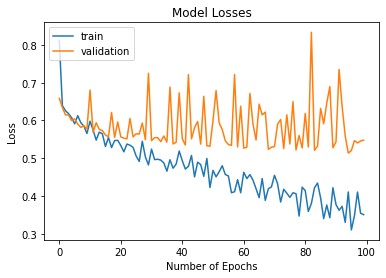

In [57]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

Perfect example of overfitting, the model's performance of thr training data is great, but on validation data, after a number of epochs, it shows no change.

5. Changing the optimizer

In [59]:
from keras.optimizers import Adam
adam=Adam(lr=1e-5)
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(100,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#summarizing our model:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [60]:
h_callback=model.fit(X_train,y_train,epochs=100,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/100
13/13 [==============================] - 1s 76ms/step - loss: 0.7360 - accuracy: 0.5194 - val_loss: 0.6414 - val_accuracy: 0.6303
Epoch 2/100
13/13 [==============================] - 1s 59ms/step - loss: 0.6411 - accuracy: 0.6263 - val_loss: 0.6132 - val_accuracy: 0.6558
Epoch 3/100
13/13 [==============================] - 1s 60ms/step - loss: 0.6057 - accuracy: 0.6894 - val_loss: 0.5929 - val_accuracy: 0.6714
Epoch 4/100
13/13 [==============================] - 1s 59ms/step - loss: 0.5865 - accuracy: 0.6870 - val_loss: 0.5804 - val_accuracy: 0.6856
Epoch 5/100
13/13 [==============================] - 1s 57ms/step - loss: 0.5725 - accuracy: 0.7141 - val_loss: 0.5722 - val_accuracy: 0.6969
Epoch 6/100
13/13 [==============================] - 1s 59ms/step - loss: 0.5601 - accuracy: 0.7177 - val_loss: 0.5814 - val_accuracy: 0.6771
Epoch 7/100
13/13 [==============================] - 1s 57ms/step - loss: 0.5339 - accuracy: 0.7406 - val_loss: 0.5827 - val_accuracy: 0.6771
Epoch 

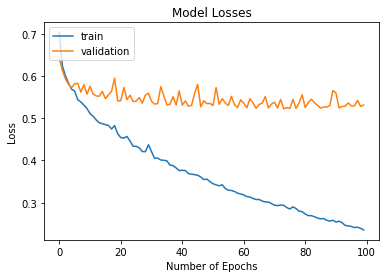

In [61]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

Again, we see overfitting of the model, but the model converges comparatively faster in the case of adam optimizer.

Thus, taking an eyeball estimate of our models above, I tried to come up with an architecture that would perform best on my model.

In [63]:
adam=Adam(lr=1e-5)
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],))) #X_train.shape[1] gives the number of features
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#summarizing our model:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [66]:
h_callback=model.fit(X_train,y_train,epochs=30,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/30
13/13 [==============================] - 1s 69ms/step - loss: 0.2117 - accuracy: 0.9569 - val_loss: 0.5126 - val_accuracy: 0.7493
Epoch 2/30
13/13 [==============================] - 1s 59ms/step - loss: 0.2082 - accuracy: 0.9611 - val_loss: 0.5311 - val_accuracy: 0.7351
Epoch 3/30
13/13 [==============================] - 1s 58ms/step - loss: 0.2141 - accuracy: 0.9550 - val_loss: 0.5198 - val_accuracy: 0.7394
Epoch 4/30
13/13 [==============================] - 1s 57ms/step - loss: 0.2070 - accuracy: 0.9587 - val_loss: 0.5146 - val_accuracy: 0.7493
Epoch 5/30
13/13 [==============================] - 1s 56ms/step - loss: 0.1990 - accuracy: 0.9642 - val_loss: 0.5280 - val_accuracy: 0.7323
Epoch 6/30
13/13 [==============================] - 1s 56ms/step - loss: 0.1970 - accuracy: 0.9666 - val_loss: 0.5281 - val_accuracy: 0.7408
Epoch 7/30
13/13 [==============================] - 1s 55ms/step - loss: 0.1903 - accuracy: 0.9708 - val_loss: 0.5218 - val_accuracy: 0.7507
Epoch 8/30
13

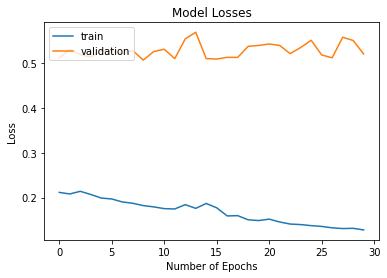

In [67]:
plt.plot(h_callback.history['loss'])
plt.plot(h_callback.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')